In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-stiffness-oregon)

In {numref}`Example {number} <example-stiffness-oregon>` we derived a Jacobian matrix for the Oregonator model. Here is a numerical solution of the ODE.

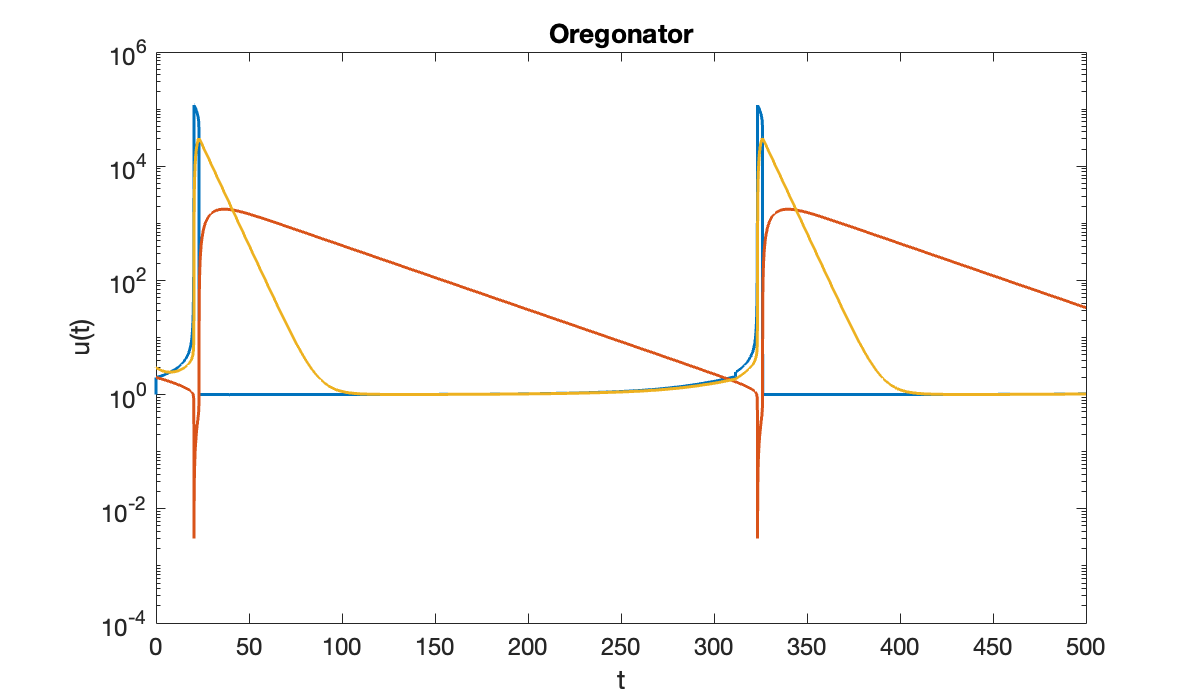

In [2]:
q = 8.375e-6;  s = 77.27;  w = 0.161;
f = @(t, u, p) [ s*(u(2)- u(1) * u(2) + u(1) - q * u(1)^2);...
    (-u(2) - u(1) * u(2) + u(3)) / s; ...
    w*(u(1) - u(3)) ];

ivp = ode(ODEFcn=f);
ivp.InitialTime = 0;
ivp.InitialValue = [1; 2; 3];
ivp.Solver = "ode15s";
sol = solve(ivp, 0, 500); 
clf,  semilogy(sol.Time, sol.Solution)
xlabel('t'),  ylabel('u(t)')
title('Oregonator')

At each value of the numerical solution, we can compute the eigenvalues of the Jacobian. Here we plot all of those eigenvalues in the complex plane.

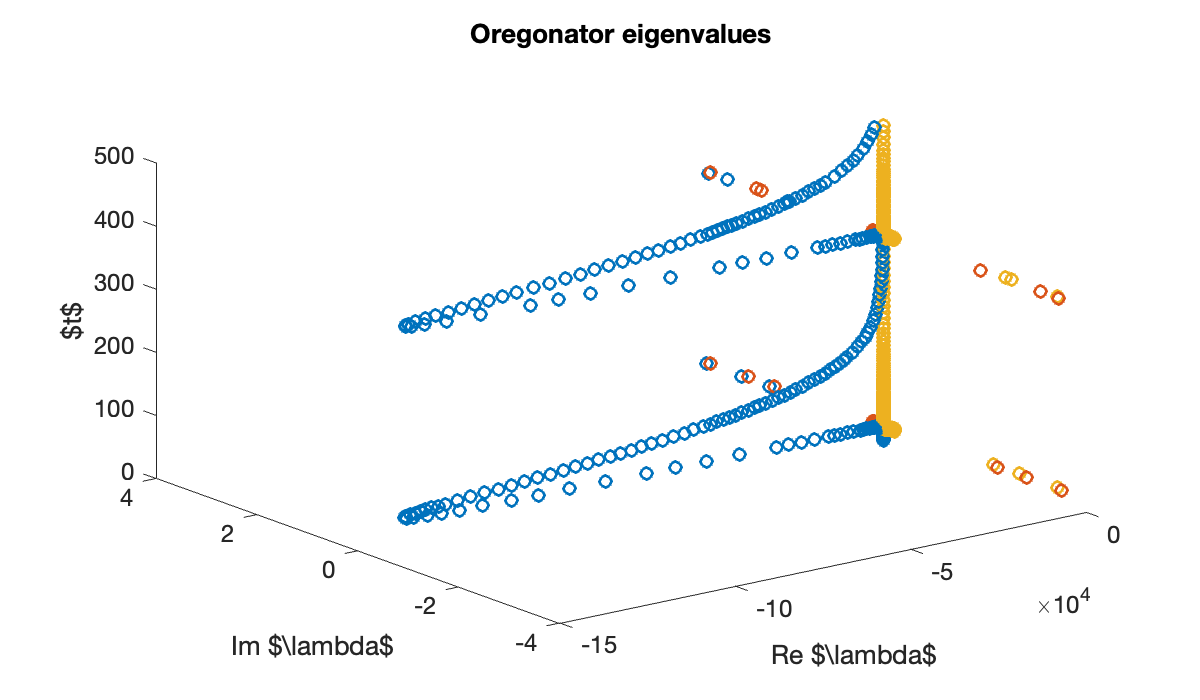

In [3]:
J = @(u) [ -s*(u(2)+1-2*q*u(1)), s*(1-u(1)), 0; ...
    -u(2)/s, (-1-u(1))/s, 1/s; ...
    w,0,-w];

t = sol.Time;
u = sol.Solution;
lambda = zeros(length(t) - 1, 3);
for j = 1:length(t)-1
    lambda(j, :) = eig(J(u(:, j)));
end
plot3(real(lambda), imag(lambda), t(1:end-1), 'o')
xlabel("Re $\\lambda$"),  ylabel("Im $\\lambda$"),  zlabel("$t$")
title("Oregonator eigenvalues")

You can see that there is one eigenvalue that ranges over a wide portion of the negative real axis and dominates stability considerations.